In [4]:
!pip install pulp sktime

# Statistics & Machine Learning in Automation and Operations

Machne learning is a field of AI that focuses on building systems that learn from data.
The goal is to use data to understand the underlying patterns and make predictions.

In general we can use:

- in a supervised way, where we somehow "know" an answer to a particular question (on trainining questions), for example: we know which engines broke based on their behaviour or we know which images show us defects
- in an unsupervised way, where we have data but we don't nesseesarely know the answers. What we ask the AI to do is to somehow divide the data into meaningfull parterns or try to compress it i.e. find features that describe best our data. For example the model can show how a "healthy machine" behaves on a factory floor and will enable us to distinguish it from a faulty ones
- reinforcement learning is a learning where we give "points/ awards" for a good results not nessesarely focusing on particular behaviours or singular decisions. For example we may train a robot to walk by awarding how far he could get without falling.

# Time series forecasting

Time series forecasting is a type of supervised learning where we use historical data to predict future values.





(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

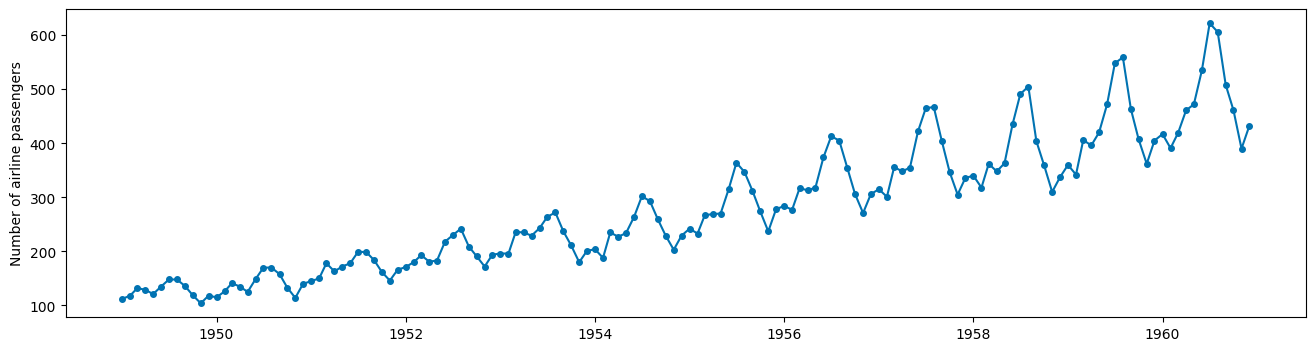

In [5]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
import numpy as np
from sktime.utils.plotting import plot_series # Import plot_series
y = load_airline() #we load an example dataset showing the monthly number of passengers on an airline

# plotting for visualization
plot_series(y)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

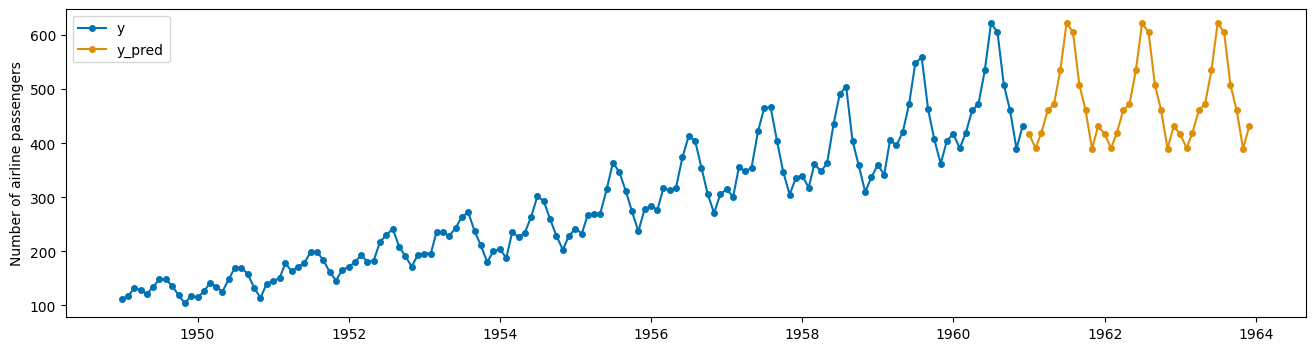

In [6]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)



# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.12/dist-packages/sktime/forecasting/base/_fh.py:863: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return r * to_offset(fh.freq)
/usr/local/lib/python3.12/dist-packages/sktime/forecasting/base/_fh.py:877: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  absolute = pd.DatetimeIndex(absolute, freq=fh.freq)


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

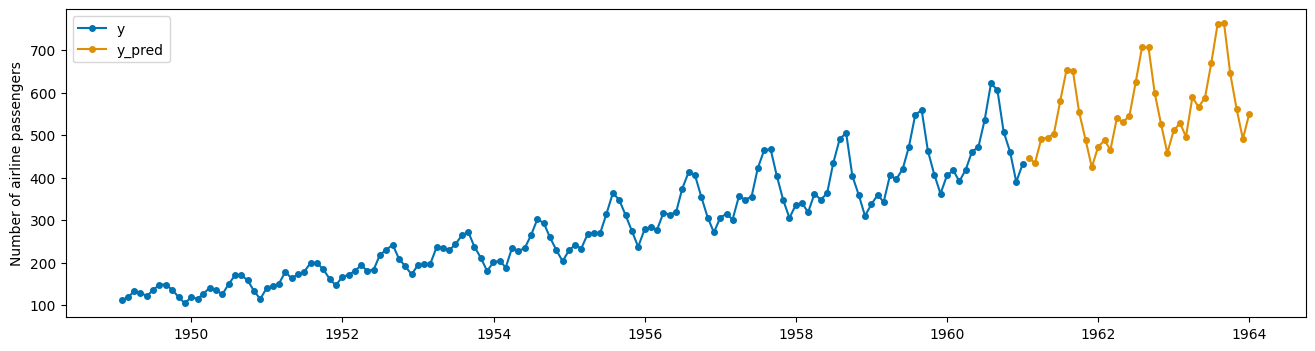

In [7]:
!pip install prophet
from sktime.datasets import load_airline
from sktime.forecasting.fbprophet import Prophet
# Prophet requires to have data with a pandas.DatetimeIndex
ym = load_airline().to_timestamp(freq='M')
forecaster = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y) / 12),
    add_country_holidays={'country_name': 'Germany'},
    yearly_seasonality=True)
forecaster.fit(ym)
Prophet(...)
y_predm = forecaster.predict(fh)
plot_series(ym, y_predm, labels=["y", "y_pred"])

# Excercise:
 download the prices of : eggs, chicken, beef, milk from https://fred.stlouisfed.org/categories/32217, other if you want

estimate what is the best blend of products for the cat food problem for june of this year, is it the same for september?


Steps:
- load the data
- plot the data
- try to find a model that forecasts the data well
- make a prediction for june of this year
- make a prediction for september of this year
- use the predictions to put the price of the blend of products on the market
- use a typical linear programming model to find the best blend of products that minimizes the cost of the blend

FRED series IDs updated for products.


/tmp/ipython-input-211305968.py:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_prices.fillna(method='ffill', inplace=True)
/tmp/ipython-input-211305968.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_prices.fillna(method='bfill', inplace=True)


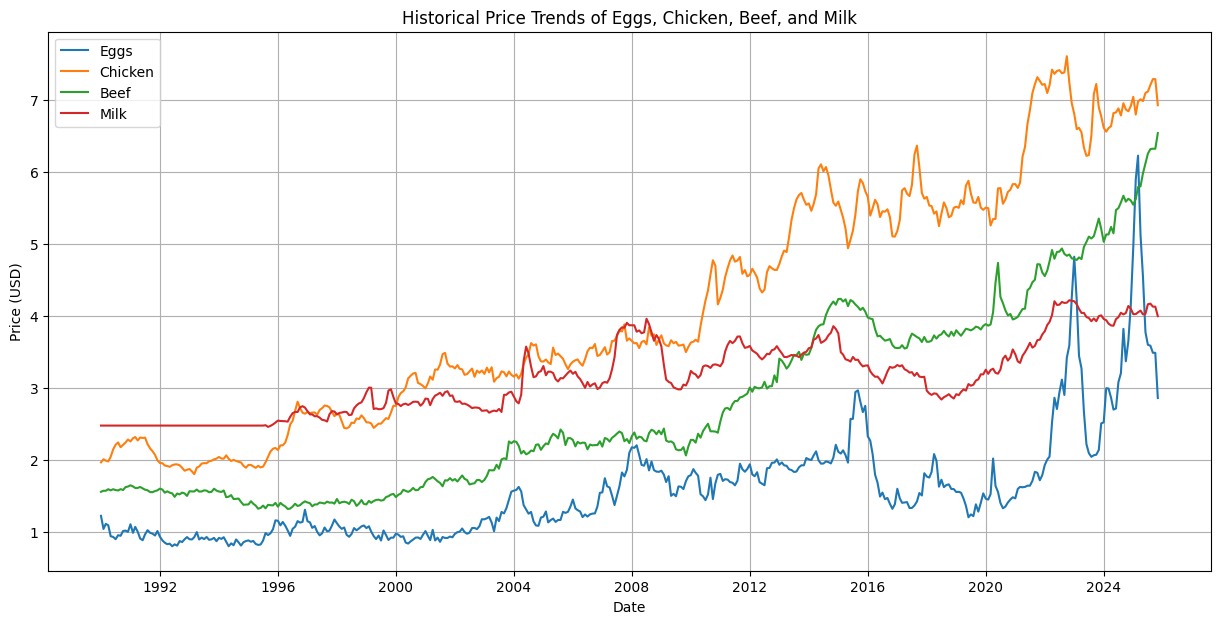

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1500x700 with 0 Axes>

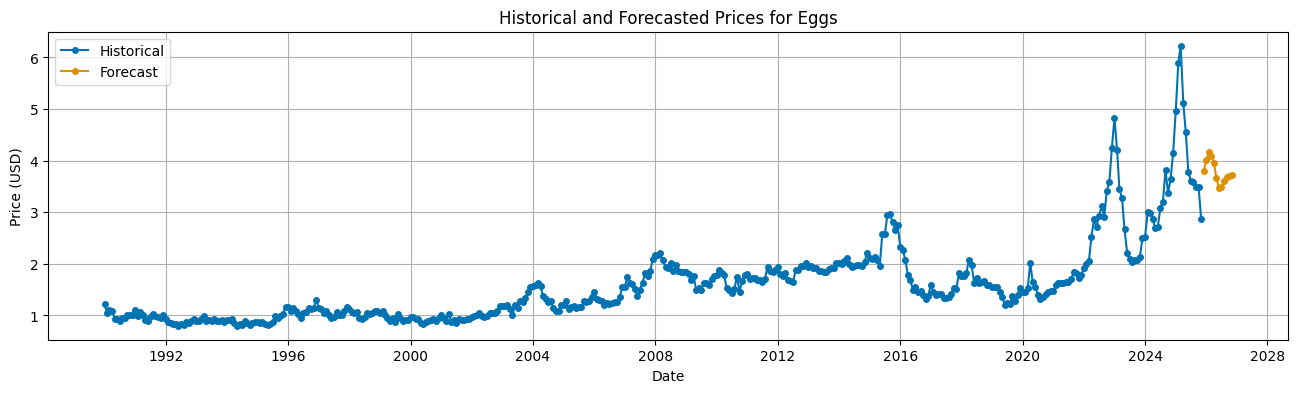

<Figure size 1500x700 with 0 Axes>

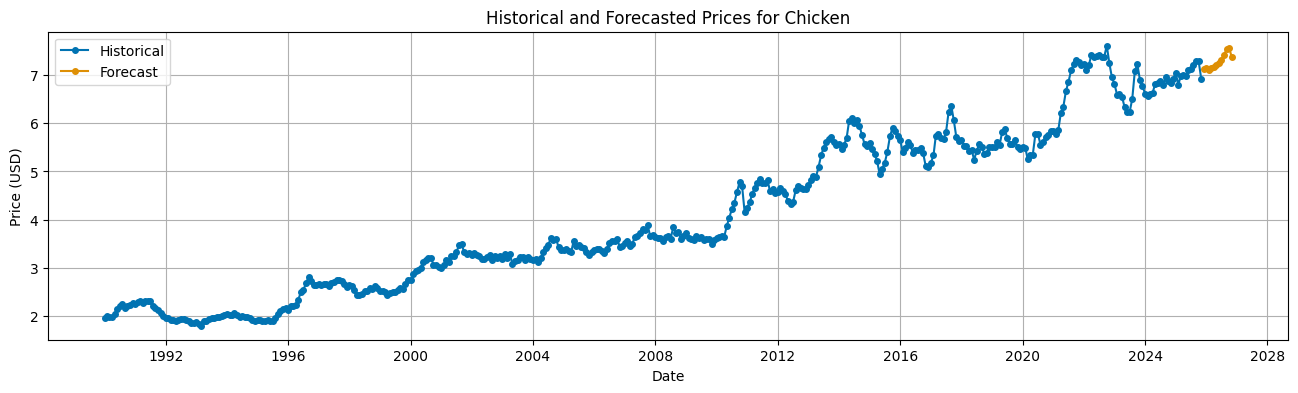

<Figure size 1500x700 with 0 Axes>

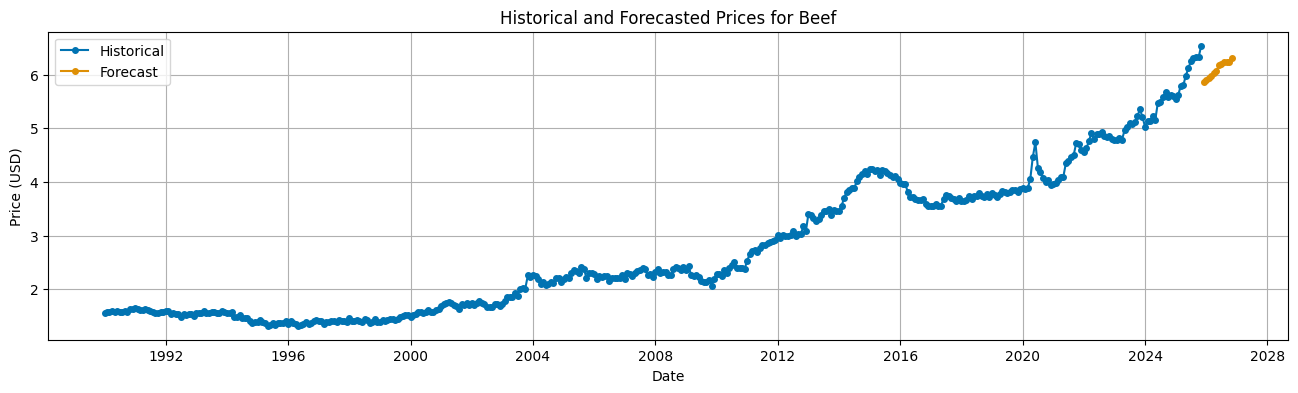

<Figure size 1500x700 with 0 Axes>

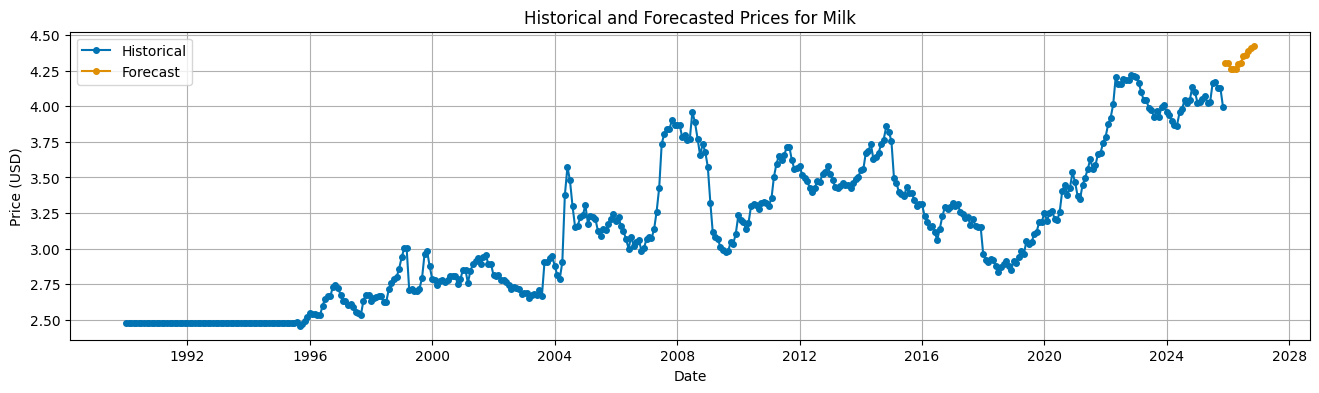


--- Forecasted Prices for the Next 12 Months ---

Eggs Forecast:
2025-12-01    3.790221
2026-01-01    4.012875
2026-02-01    4.160928
2026-03-01    4.094011
2026-04-01    3.958236
2026-05-01    3.668647
2026-06-01    3.466318
2026-07-01    3.496076
2026-08-01    3.608764
2026-09-01    3.689738
2026-10-01    3.701233
2026-11-01    3.719587

Chicken Forecast:
2025-12-01    7.122422
2026-01-01    7.151138
2026-02-01    7.099486
2026-03-01    7.148963
2026-04-01    7.164575
2026-05-01    7.205269
2026-06-01    7.259233
2026-07-01    7.307404
2026-08-01    7.421371
2026-09-01    7.536022
2026-10-01    7.555788
2026-11-01    7.373047

Beef Forecast:
2025-12-01    5.862316
2026-01-01    5.896831
2026-02-01    5.946727
2026-03-01    5.977765
2026-04-01    6.030539
2026-05-01    6.066706
2026-06-01    6.178141
2026-07-01    6.199026
2026-08-01    6.238494
2026-09-01    6.237486
2026-10-01    6.243412
2026-11-01    6.315740

Milk Forecast:
2025-12-01    4.305297
2026-01-01    4.299861
2026-02-0

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.fbprophet import Prophet

products_fred_ids = {
    'Eggs': 'APU0000708111',
    'Chicken': 'APU0000704111',
    'Beef': 'APU0000703112',
    'Milk': 'APU0000709112'
}
print("FRED series IDs updated for products.")

start_date = '1990-01-01'
df_prices = pd.DataFrame()

for product, fred_id in products_fred_ids.items():
    try:
        # Fetch data from FRED
        data = web.DataReader(fred_id, 'fred', start_date)
        # Rename the column to the product name
        data.rename(columns={fred_id: product}, inplace=True)
        # If df_prices is empty, initialize it with the first product's data
        if df_prices.empty:
            df_prices = data
        else:
            # Merge with existing DataFrame
            df_prices = df_prices.merge(data, left_index=True, right_index=True, how='outer')
    except Exception as e:
        print(f"Could not retrieve data for {product} ({fred_id}): {e}")

# Ensure index is datetime and sort
df_prices.index = pd.to_datetime(df_prices.index)
df_prices.sort_index(inplace=True)

# Handle missing values using forward fill, then backward fill for any leading NaNs
df_prices.fillna(method='ffill', inplace=True)
df_prices.fillna(method='bfill', inplace=True)

plt.figure(figsize=(15, 7))
for column in df_prices.columns:
    plt.plot(df_prices.index, df_prices[column], label=column)

plt.title('Historical Price Trends of Eggs, Chicken, Beef, and Milk')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

last_date = df_prices.index.max()
# Create a forecasting horizon for the next 12 months (excluding the current month)
fh = ForecastingHorizon(pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS'), is_relative=False)

predicted_prices = {}
forecasters = {}

for product in df_prices.columns:
    # sktime's Prophet wrapper expects a pd.Series with a DatetimeIndex
    # The product column from df_prices is already in this format.
    y_product_series = df_prices[product].astype(float)

    # Initialize and fit the Prophet model
    forecaster = Prophet(
        seasonality_mode='multiplicative',
        n_changepoints=int(len(y_product_series) / 12),
        yearly_seasonality=True
    )
    # Fit the model to the specific product's historical data
    forecaster.fit(y_product_series)
    forecasters[product] = forecaster

    # Query predictions for the defined forecasting horizon
    y_pred_product = forecaster.predict(fh)
    predicted_prices[product] = y_pred_product

for product in df_prices.columns:
    plt.figure(figsize=(15, 7))
    # plot_series expects a Series for historical data and a Series for predictions
    plot_series(df_prices[product], predicted_prices[product], labels=["Historical", "Forecast"]);
    plt.title(f'Historical and Forecasted Prices for {product}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.show()

print("\n--- Forecasted Prices for the Next 12 Months ---")
for product, forecast_series in predicted_prices.items():
    print(f"\n{product} Forecast:")
    print(forecast_series.to_string())

# Regression models

Regression models are a type of supervised learning where we estimate a function that maps inputs to outputs.





In [35]:
import pandas as pd

url = 'https://raw.githubusercontent.com/AdoHaha/automation_robotics_lab/master/data/sensor_readings_timeseries.csv'
df = pd.read_csv(url)


df.head()  # Wyświetlenie pierwszych kilku wierszy


# Load the CSV file into a pandas DataFrame
df_failures = pd.read_csv(url)

# Display the first few rows to verify loading
print(df_failures.head())

# Display basic information about the DataFrame
print(df_failures.info())

# Display descriptive statistics
df_failures.describe()

   instance_id  machine_id department failure_type   time  sensor_temp  \
0            1           4    Welding   Mechanical    0.0    62.887414   
1            1           4    Welding   Mechanical  100.0    67.749149   
2            1           4    Welding   Mechanical  200.0    63.446070   
3            1           4    Welding   Mechanical  300.0    65.999297   
4            1           4    Welding   Mechanical  400.0    61.228597   

   sensor_vib           rul  near_failure  
0    0.174999  10308.096762             0  
1    0.149790  10208.096762             0  
2    0.202742  10108.096762             0  
3    0.213483  10008.096762             0  
4    0.221188   9908.096762             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190339 entries, 0 to 190338
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   instance_id   190339 non-null  int64  
 1   machine_id    190339 non-null  int64  
 2   

,instance_id,machine_id,time,sensor_temp,sensor_vib,rul,near_failure
count,190339.000000,190339.000000,190339.000000,190339.000000,190339.000000,190339.000000,190339.000000
mean,3953.601327,2.082763,5472.699343,61.548008,1.295366,5426.586009,0.084061
std,2302.519752,1.225247,8678.079374,11.082120,2.353995,8675.590773,0.277479
min,1.000000,1.000000,0.000000,41.868645,0.010000,0.000000,0.000000
25%,1945.000000,1.000000,600.000000,52.771829,0.115480,566.584477,0.000000
50%,3955.000000,1.000000,2000.000000,57.975624,0.158956,1928.113178,0.000000
75%,5947.000000,3.000000,6200.000000,68.487811,1.128911,6125.310478,0.000000
max,8000.000000,4.000000,76285.247981,101.395336,9.781395,76285.247981,1.000000


In [36]:
try:
    # Try running the generation scripts
    !python generate_four_machines.py
    !python generate_sensor_timeseries.py
except:
    # If generation fails, download the data file
    import os
    if not os.path.exists('data'):
        os.makedirs('data')

    !curl -L https://raw.githubusercontent.com/AdoHaha/automation_robotics_lab/master/data/sensor_readings_timeseries.csv -o data/sensor_readings_timeseries.csv


python3: can't open file '/content/generate_four_machines.py': [Errno 2] No such file or directory
python3: can't open file '/content/generate_sensor_timeseries.py': [Errno 2] No such file or directory


In [37]:
import numpy as np
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_failures[['machine_id', 'time', 'sensor_temp', 'sensor_vib']]
y = df_failures['near_failure']
# Get unique instance IDs
unique_instances = df_failures['instance_id'].unique()

# Split the instance IDs into training and testing sets (70% train, 30% test)
train_instances, test_instances = train_test_split(
    unique_instances,
    test_size=0.3,
    random_state=42
)

# Create train and test sets based on instance IDs
X_train = X[df_failures['instance_id'].isin(train_instances)]
y_train = y[df_failures['instance_id'].isin(train_instances)]

X_test = X[df_failures['instance_id'].isin(test_instances)]
y_test = y[df_failures['instance_id'].isin(test_instances)]

print(f"Training set size: {len(X_train)} samples from {len(train_instances)} instances")
print(f"Testing set size: {len(X_test)} samples from {len(test_instances)} instances")


Training set size: 132641 samples from 5600 instances
Testing set size: 57698 samples from 2400 instances


In [38]:
from sklearn.ensemble import RandomForestClassifier
# Import additional classifiers for comparison
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:



# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=10,  # Number of trees in the forest
    random_state=42,  # For reproducibility
    class_weight='balanced',  # Address class imbalance
    max_depth=5
)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)




RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10,
                       random_state=42)

In [ ]:
# calculate the accuracy of the model
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the classifier on the training data
gradient_boosting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting_classifier.predict(X_test)



# Excercise:  Try to get the accuracy to over 98% by changing the model or the parameters

In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    random_state=2
)

model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9710735207459531


# Excercise:

- A reading for a machine of type 4 was recorded when machine had 110.0 workhours. Its sensor showed a temperature of 87.18 degrees Celsius and a vibration level of 5.96.
- A reading for a machine of type 1 was recorded when machine had 250.0 workhours. Its sensor showed a temperature of 76.05 degrees Celsius and a vibration level of 8.43.
- A reading for a machine of type 3 was recorded when machine had 690.0 workhours. Its sensor showed a temperature of 57.36 degrees Celsius and a vibration level of 0.07.
- A reading for a machine of type 1 was recorded when machine had 20510.0 workhours. Its sensor showed a temperature of 53.30 degrees Celsius and a vibration level of 0.08.
- A reading for a machine of type 2 was recorded when machine had 270.0 workhours. Its sensor showed a temperature of 71.13 degrees Celsius and a vibration level of 0.22.
- A reading for a machine of type 4 was recorded when machine had 110.0 workhours. Its sensor showed a temperature of 67.56 degrees Celsius and a vibration level of 0.13.

You have two technicians available, that cost 600 PLN/hour. You have a budget of 1800 PLN. Each machine requires an hour to service. Which machine to service if machine of the type 1,2 failure cost you 3000 PLN, machine of the 3, 4 failure costs you 2500 PLN?

In [43]:
import pandas as pd
import numpy as np

data = [
    {"id": 1, "type": 4, "hours": 110, "temp": 87.18, "vib": 5.96},
    {"id": 2, "type": 1, "hours": 250, "temp": 76.05, "vib": 8.43},
    {"id": 3, "type": 3, "hours": 690, "temp": 57.36, "vib": 0.07},
    {"id": 4, "type": 1, "hours": 20510, "temp": 53.30, "vib": 0.08},
    {"id": 5, "type": 2, "hours": 270, "temp": 71.13, "vib": 0.22},
    {"id": 6, "type": 4, "hours": 110, "temp": 67.56, "vib": 0.13},
]

df = pd.DataFrame(data)

# Failure cost
def calculate_failure_cost(machine_type):
    if machine_type in [1, 2]:
        return 3000
    else:
        return 2500

df["failure_cost"] = df["type"].apply(calculate_failure_cost)


df["temp_normalized"] = df["temp"] / df["temp"].max()
df["vib_normalized"] = df["vib"] / df["vib"].max()
df["hours_normalized"] = df["hours"] / df["hours"].max()

# Risk function
df["risk_score"] = (
    0.4 * df["vib_normalized"] +
    0.3 * df["temp_normalized"] +
    0.3 * df["hours_normalized"]
)


df["expected_loss"] = df["risk_score"] * df["failure_cost"]

df_machines_sorted_by_loss = df.sort_values(by="expected_loss", ascending=False)


service_cost_per_machine = 600
budget = 1800
max_servicable_machines = budget // service_cost_per_machine

# Machine selection
machines_to_service = df_machines_sorted_by_loss.head(max_servicable_machines)

print("Machines to service:\n")
print(machines_to_service[["id", "type", "risk_score", "expected_loss"]])

print("\nTotal service cost:", max_servicable_machines * service_cost_per_machine, "PLN")
print("Avoided expected failure cost:",
      machines_to_service["expected_loss"].sum(), "PLN")


Machines to service:

   id  type  risk_score  expected_loss
1   2     1    0.665357    1996.070052
3   4     1    0.487210    1461.628781
0   1     4    0.584408    1461.021242

Total service cost: 1800 PLN
Avoided expected failure cost: 4918.7200750772645 PLN
